# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera
#### by Nelida Nkumu Mbomio Ada

## Introduction

Looking for a place to live has never been such an arduous task as it is nowadays. Not only we should find a nice apartment with all the facilities we could need, it is equally important to live in an area that satisfies all our needs. Well, maybe we know a neighbourhood that fits our needs but it could be quite expensive, so we have to invest a lot of time an effort looking for another similir area where to live.
Here, we are going to help the stakeholders identifying neighborhoods that could be interesting for them.
How are we going to identify a neighborhood as interesting? Well, we have to provide two things:

1. the ideal neighborhood
2. the city where we want lo look for an apartment With this, we can try to find a similar neighborhood into the provided city.

For the purposes of our study, we will be foucusing on:
1. Soto del Henares in Torrejón de Ardoz (Madrid, Spain) as our ideal neighborhood
2. Madrid city as the city where we want to live.

The data we will need to carry out this study will be the information about the neighborhoods in Madrid and the information about Torrejón de Ardoz.


## Import section

First, we have to import all the libraries we are going to be using

In [1]:
from bs4 import BeautifulSoup
from time import sleep

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

import matplotlib.pyplot as plt

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.0               |             py_0          26 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                       

We are going to get the list of neighborhoods and districts in Madrid by scrapping [Wikipedia](https://es.wikipedia.org/wiki/Anexo:Barrios_administrativos_de_Madrid), where there is a table with all the districts in Madrid and their neighborhoods.
Thanks to this procedure we will obtain a dataframe with the columns _District_ and _Neighborhood_.

In [2]:
source = requests.get('https://es.wikipedia.org/wiki/Anexo:Barrios_administrativos_de_Madrid').text
soup = BeautifulSoup(source,'html.parser')

table = soup.find('table', class_='wikitable')

tmp = table.find_all('tr')

first = tmp[0]
allRows = tmp[1:]

headers = [header.get_text() for header in first.find_all('th')]

results = [[data.get_text().replace('\n', '') for data in row.find_all('td')] for row in allRows]

rowspan = []

for no, tr in enumerate(allRows):
    tmp = []
    for td_no, data in enumerate(tr.find_all('td')):
        if data.has_attr("rowspan"):
            rowspan.append((no, td_no, int(data["rowspan"]), data.find_all('a')[0].text.replace('\n', '')))

if rowspan:
    for i in rowspan:
        # tr value of rowspan in present in 1th place in results
        for j in range(1, i[2]):
            #- Add value in next tr.
            results[i[0]+j].insert(i[1], i[3])


df = pd.DataFrame(data=results, columns=['District','Number', 'Neighborhood', 'Surface', 'Image'])
df = df[['District','Neighborhood']]
df


,District,Neighborhood
0,Centro,Palacio
1,Centro,Embajadores
2,Centro,Cortes
3,Centro,Justicia
4,Centro,Universidad
5,Centro,Sol
6,Arganzuela,Imperial
7,Arganzuela,Acacias
8,Arganzuela,Chopera
9,Arganzuela,Legazpi


Now, we have to define a method to get the coordinates given a district and a neighborhood and iterate this function over all the rows in the dataframe.

In [3]:
def get_coordinates(neighborhood, district):
    address = '{}, {}, Madrid, Spain'.format(neighborhood, district)
    geolocator = Nominatim(user_agent="xxx.gmail.com")
    location = geolocator.geocode(address)
    return location

In [4]:
neighborhoods = []
districts = []
latitudes = []
longitudes = []

for index, row in df.iterrows():
    coords = get_coordinates(row["Neighborhood"], row["District"])
    neighborhoods.append(row["Neighborhood"])
    districts.append(row["District"])
    latitudes.append('' if coords is None else coords.latitude)
    longitudes.append('' if coords is None else coords.longitude)
    sleep(2) # Required by Nominatium policy
    
# Define a dictionary containing the data 
data = {'District': districts, 
        'Neighborhood': neighborhoods, 
        'Latitude': latitudes,
        'Longitude': longitudes} 

We create a dataframe with District, Neighborhood, Latitude and Longitude.
We can see below that there are some records with no longitude and latitude as geocode was not able to retrive them, so we will remove those rows.

In [5]:
df_madrid = pd.DataFrame(data)
df_madrid

,District,Neighborhood,Latitude,Longitude
0,Centro,Palacio,40.4151,-3.71562
1,Centro,Embajadores,40.4097,-3.70164
2,Centro,Cortes,40.4148,-3.69758
3,Centro,Justicia,40.424,-3.69575
4,Centro,Universidad,40.4254,-3.70599
5,Centro,Sol,40.4178,-3.70222
6,Arganzuela,Imperial,40.4058,-3.71869
7,Arganzuela,Acacias,40.4041,-3.70596
8,Arganzuela,Chopera,40.3949,-3.69971
9,Arganzuela,Legazpi,40.3912,-3.69519


In [6]:
df_madrid = df_madrid[df_madrid.Longitude != '']
df_madrid

,District,Neighborhood,Latitude,Longitude
0,Centro,Palacio,40.4151,-3.71562
1,Centro,Embajadores,40.4097,-3.70164
2,Centro,Cortes,40.4148,-3.69758
3,Centro,Justicia,40.424,-3.69575
4,Centro,Universidad,40.4254,-3.70599
5,Centro,Sol,40.4178,-3.70222
6,Arganzuela,Imperial,40.4058,-3.71869
7,Arganzuela,Acacias,40.4041,-3.70596
8,Arganzuela,Chopera,40.3949,-3.69971
9,Arganzuela,Legazpi,40.3912,-3.69519


Let's draw our map of Madrid marking all the neighborhoods.

In [7]:
address = 'Madrid, Spain'

geolocator = Nominatim(user_agent="xxx.gmail.com")
madrid_location = geolocator.geocode(address)
print('The geograpical coordinates of Madrid are {}, {}.'.format(madrid_location.latitude, madrid_location.longitude))

The geograpical coordinates of Madrid are 40.4167047, -3.7035825.


In [8]:
# create map of Madrid using latitude and longitude values
map_madrid = folium.Map(location=[madrid_location.latitude, madrid_location.longitude], zoom_start=10)

# add markers to map
for lat, lng, district, neighborhood in zip(df_madrid['Latitude'], df_madrid['Longitude'], df_madrid['District'], df_madrid['Neighborhood']):
    label = '{}, {}'.format(neighborhood, district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_madrid)  
    
map_madrid

We have to include our desired neighborhood into the data frame to be clustered in the following steps. To do so, we will get the coordinates of Soto del Henares and include the result in our dataframe.

In [9]:
address = 'Soto del Henares, Torrejón de Ardoz, Madrid, Spain'

geolocator = Nominatim(user_agent="xxx.gmail.com")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Soto del Henares are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Soto del Henares are 40.4605469, -3.4399632.


In [10]:
df_madrid = df_madrid.append(pd.Series(['Torrejón de Ardoz', 'Soto del Henares', latitude, longitude], index=df_madrid.columns ), ignore_index=True)

In [11]:
# The code was removed by Watson Studio for sharing.

## Explore Madrid

Let's create a function to get the most important venues in all the neighborhoods in Madrid

In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

We have to create a new datafame with all the relevant venues in our neighborhoods.

In [13]:
madrid_venues = getNearbyVenues(names=df_madrid['Neighborhood'],
                                   latitudes=df_madrid['Latitude'],
                                   longitudes=df_madrid['Longitude']
                                  )

Palacio
Embajadores
Cortes
Justicia
Universidad
Sol
Imperial
Acacias
Chopera
Legazpi
Delicias
Palos de Moguer
Atocha
Pacífico
Adelfas
Estrella
Ibiza
Jerónimos
Niño Jesús
Recoletos
Goya
Fuente del Berro
La Guindalera
Lista
Castellana
El Viso
Prosperidad
Ciudad Jardín
Hispanoamérica
Nueva España
Castilla
Bellas Vistas
Cuatro Caminos
Castillejos
Almenara
Valdeacederas
Berruguete
Gaztambide
Arapiles
Trafalgar
Almagro
Ríos Rosas
Vallehermoso
El Pardo
Fuentelarreina
Peñagrande
El Pilar
La Paz
Valverde
Mirasierra
El Goloso
Casa de Campo
Argüelles
Ciudad Universitaria
Valdezarza
Valdemarín
El Plantío
Aravaca
Puerta del Ángel
Lucero
Aluche
Campamento
Cuatro Vientos
Las Águilas
Comillas
Opañel
San Isidro
Vista Alegre
Puerta Bonita
Buenavista
Abrantes
Orcasitas
Orcasur
San Fermín
Almendrales
Moscardó
Zofío
Pradolongo
Entrevías
San Diego
Palomeras Bajas
Palomeras Sureste
Portazgo
Numancia
Pavones
Horcajo
Marroquina
Media Legua
Fontarrón
Vinateros
Ventas
Pueblo Nuevo
Quintana
Concepción
San Pascual

In [14]:
print(madrid_venues.shape)
madrid_venues.head()

(3480, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Palacio,40.415129,-3.715618,Santa Iglesia Catedral de Santa María la Real ...,40.415767,-3.714516,Church
1,Palacio,40.415129,-3.715618,Plaza de La Almudena,40.416320,-3.713777,Plaza
2,Palacio,40.415129,-3.715618,Cervecería La Mayor,40.415218,-3.712194,Beer Bar
3,Palacio,40.415129,-3.715618,Taberna Rayuela,40.413179,-3.713496,Tapas Restaurant
4,Palacio,40.415129,-3.715618,Palacio Real de Madrid,40.417940,-3.714259,Palace


How many venues were returned by each dataframe?

In [15]:
madrid_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Abrantes,6,6,6,6,6,6
Acacias,45,45,45,45,45,45
Adelfas,38,38,38,38,38,38
Alameda de Osuna,24,24,24,24,24,24
Almagro,100,100,100,100,100,100
Almenara,13,13,13,13,13,13
Almendrales,18,18,18,18,18,18
Aluche,10,10,10,10,10,10
Amposta,6,6,6,6,6,6


In [16]:
print('There are {} uniques categories.'.format(len(madrid_venues['Venue Category'].unique())))

There are 256 uniques categories.


## Analyze Each Neighborhood

In [17]:
# one hot encoding
madrid_onehot = pd.get_dummies(madrid_venues['Venue Category'], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
madrid_onehot['Neighborhood'] = madrid_venues['Neighborhood']
neighborhood_idx = madrid_onehot.columns.get_loc('Neighborhood')

# move neighborhood column to the first column
fixed_columns = [madrid_onehot.columns[neighborhood_idx]] + list(madrid_onehot.columns[0:neighborhood_idx])+list(madrid_onehot.columns[neighborhood_idx+1:])
madrid_onehot = madrid_onehot[fixed_columns]

madrid_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Burger Joint,Burrito Place,Bus Station,Cafeteria,Café,Camera Store,Candy Store,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Auditorium,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Shop,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Embassy / Consulate,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Stand,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nightclub,Noodle House,North Indian Restaurant,Office,Optical Shop,Other Event,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pie Shop,Pizza Place,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Resort,Restaurant,Road,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Taco Place,Tapas Restaurant,Taverna,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trade School,Train Station,Travel Agency,Travel Lounge,Udon Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Palacio,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [18]:
madrid_onehot.shape

(3480, 256)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [19]:
madrid_grouped = madrid_onehot.groupby('Neighborhood').mean().reset_index()
madrid_grouped

,Neighborhood,Accessories Store,Adult Boutique,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Burger Joint,Burrito Place,Bus Station,Cafeteria,Café,Camera Store,Candy Store,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Auditorium,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Shop,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Embassy / Consulate,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Stand,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nightclub,Noodle House,North Indian Restaurant,Office,Optical Shop,Other Event,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pie Shop,Pizza Place,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Resort,Restaurant,Road,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Taco Place,Tapas Restaurant,Taverna,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trade School,Train Station,Travel Agency,Travel Lounge,Udon Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Abrantes,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.166667,0.000000,0.00,0.166667,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [20]:
madrid_grouped.shape

(126, 256)

Let's print each neighborhood along with the top 5 most common venues

In [21]:
num_top_venues = 5

for hood in madrid_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = madrid_grouped[madrid_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abrantes----
                  venue  freq
0          Soccer Field  0.17
1  Fast Food Restaurant  0.17
2            Restaurant  0.17
3           Pizza Place  0.17
4                Bakery  0.17


----Acacias----
                venue  freq
0                 Bar  0.09
1  Spanish Restaurant  0.07
2         Art Gallery  0.07
3                Park  0.07
4              Bakery  0.04


----Adelfas----
                  venue  freq
0                   Bar  0.05
1  Fast Food Restaurant  0.05
2      Tapas Restaurant  0.05
3           Supermarket  0.05
4                 Hotel  0.05


----Alameda de Osuna----
        venue  freq
0      Bakery  0.08
1  Restaurant  0.08
2  Smoke Shop  0.08
3       Hotel  0.08
4   Bookstore  0.04


----Almagro----
                      venue  freq
0        Spanish Restaurant  0.14
1                Restaurant  0.11
2                     Hotel  0.08
3  Mediterranean Restaurant  0.05
4                       Bar  0.04


----Almenara----
                  venue  freq
0

Let's put that into a pandas dataframe. First, let's write a function to sort the venues in descending order.

In [22]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [33]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = madrid_grouped['Neighborhood']

for ind in np.arange(madrid_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(madrid_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abrantes,Restaurant,Soccer Field,Bakery,Athletics & Sports,Fast Food Restaurant,Pizza Place,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Fountain
1,Acacias,Bar,Park,Art Gallery,Spanish Restaurant,Pizza Place,Grocery Store,Restaurant,Tapas Restaurant,Bakery,Hotel
2,Adelfas,Supermarket,Tapas Restaurant,Spanish Restaurant,Hotel,Fast Food Restaurant,Grocery Store,Bar,Football Stadium,Bookstore,Metro Station
3,Alameda de Osuna,Smoke Shop,Bakery,Hotel,Restaurant,Fried Chicken Joint,Shop & Service,Chinese Restaurant,Breakfast Spot,Scenic Lookout,Metro Station
4,Almagro,Spanish Restaurant,Restaurant,Hotel,Mediterranean Restaurant,Bar,French Restaurant,Japanese Restaurant,Supermarket,Bookstore,Cocktail Bar


Let's take a look at Soto del Henares common venues.

In [34]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted['Neighborhood'] == 'Soto del Henares']

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
110,Soto del Henares,Gastropub,Train Station,Cafeteria,Seafood Restaurant,Mediterranean Restaurant,Market,Spanish Restaurant,Eastern European Restaurant,Electronics Store,Furniture / Home Store


## Cluster Neighborhoods

Let's look for the best k value

In [35]:
Ks = 50
final_cluster_size = np.zeros((Ks))
city_grouped_clustering = madrid_grouped.drop('Neighborhood', 1)
for n in range(1,Ks+1):

    #Train Model and Predict
    kmeans = KMeans(n_clusters=n, random_state=0).fit(city_grouped_clustering)
    soto_cluster = kmeans.labels_[110]
    final_cluster_size[n-1] = np.count_nonzero(kmeans.labels_==soto_cluster)
final_cluster_size

array([126., 122., 109., 111.,  99.,  88.,  64.,  31.,  72.,  93.,  40.,
        51.,  47.,  61.,  20.,  56.,  31.,  35.,  51.,  15.,  23.,  47.,
        27.,   1.,  52.,  21.,  59.,  35.,  59.,  25.,  52.,  44.,   9.,
        19.,   6.,  37.,  20.,  26.,   1.,   1.,   1.,  36.,  23.,   1.,
         1.,   1.,   1.,  39.,   1.,   1.])

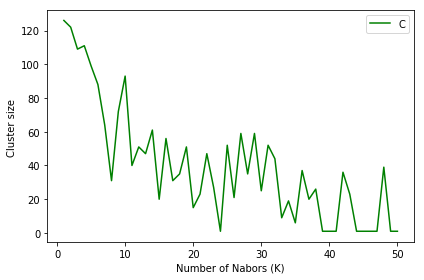

In [36]:
plt.plot(range(1,Ks+1),final_cluster_size,'g')
plt.legend(('Cluster size '))
plt.ylabel('Cluster size ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

After running k-means with values for k in the range \[1, 50\], we have to decide which value of k is most appropiate for this scenario.
Due to the nature of the problematic and the final stakeholders, we should not consider those k that results in a huge cluster size for Soto del Henares; if the cluster is too big, the stakeholder will not be able to analyze all those neighborhoods and the problem will still be same.
Anologously, we should not consider those clusters where the only neighborhood is Soto del Henares.

Finally, we decided to take k = 35, with a cluster size of 6 neighborhoods (including Soto del Henares).

Run k-means to cluster the neighborhood into 35 clusters.

In [37]:
# set number of clusters
kclusters = 35

madrid_grouped_clustering = madrid_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(madrid_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([30, 19, 19,  1,  8, 15, 15,  3, 29, 12], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [38]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

madrid_merged = df_madrid

# merge madrid_merged with madrid_df to add latitude/longitude for each neighborhood
madrid_merged = madrid_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
madrid_merged.dropna(inplace=True)
madrid_merged.head() # check the last columns!

,District,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Centro,Palacio,40.4151,-3.71562,8.0,Plaza,Spanish Restaurant,Tapas Restaurant,Bar,Restaurant,Historic Site,Cocktail Bar,Beer Bar,Mexican Restaurant,Music Venue
1,Centro,Embajadores,40.4097,-3.70164,1.0,Café,Bar,Spanish Restaurant,Hostel,Art Gallery,Bookstore,Tapas Restaurant,Theater,Hotel,Pizza Place
2,Centro,Cortes,40.4148,-3.69758,1.0,Restaurant,Hotel,Bar,Tapas Restaurant,Café,Mediterranean Restaurant,Spanish Restaurant,Plaza,Theater,Italian Restaurant
3,Centro,Justicia,40.424,-3.69575,8.0,Restaurant,Spanish Restaurant,Hotel,Bakery,Bookstore,Deli / Bodega,Flower Shop,Sandwich Place,Vegetarian / Vegan Restaurant,Bistro
4,Centro,Universidad,40.4254,-3.70599,1.0,Café,Tapas Restaurant,Bookstore,Plaza,Bar,Japanese Restaurant,Argentinian Restaurant,Theater,Coffee Shop,Cocktail Bar


Finally, let's visualize the resulting clusters

In [39]:
# create map
map_clusters = folium.Map(location=[madrid_location.latitude, madrid_location.longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(madrid_merged['Latitude'], madrid_merged['Longitude'], madrid_merged['Neighborhood'], madrid_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Let's see what is the cluster where Soto del Henares has been included.

In [40]:
final_cluster = madrid_merged.loc[madrid_merged['Neighborhood'] == 'Soto del Henares','Cluster Labels'].tolist()[0]
final_cluster

15.0

We create a dataframe with a the neighborhoods and their most common venues in the cluster of Soto del Henares

In [41]:
final_df = madrid_merged.loc[madrid_merged['Cluster Labels'] == final_cluster, madrid_merged.columns[[1] + list(range(5, madrid_merged.shape[1]))]]
final_df.shape

(6, 11)

In [42]:
final_df

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,Almenara,Spanish Restaurant,BBQ Joint,Department Store,Chinese Restaurant,Flea Market,Seafood Restaurant,Sandwich Place,Library,Restaurant,Gym / Fitness Center
48,Valverde,Italian Restaurant,Train Station,Breakfast Spot,Sushi Restaurant,Tapas Restaurant,Mediterranean Restaurant,Tennis Court,Bakery,Spanish Restaurant,Historic Site
56,El Plantío,Italian Restaurant,Spanish Restaurant,Asian Restaurant,Burger Joint,Sporting Goods Shop,Shopping Mall,Seafood Restaurant,Bookstore,Mediterranean Restaurant,Gym
74,Almendrales,Spanish Restaurant,Bar,Seafood Restaurant,Grocery Store,Fast Food Restaurant,Bakery,Train Station,BBQ Joint,Chinese Restaurant,Noodle House
101,Canillas,Spanish Restaurant,Italian Restaurant,Juice Bar,Gym,Clothing Store,Pub,Soccer Field,Skating Rink,Shopping Mall,Sandwich Place
128,Soto del Henares,Gastropub,Train Station,Cafeteria,Seafood Restaurant,Mediterranean Restaurant,Market,Spanish Restaurant,Eastern European Restaurant,Electronics Store,Furniture / Home Store


Above, we have the list of neighborhoods similar to Soto del Henares.